# Simulation 1


## Importing Libraries

We import basic libraries and modules for our simulation

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter as SGfilter
from IPython.display import clear_output
import datetime
import joblib
from tqdm import tqdm

import const
import utilities as ut
import mockSQLenv as SQLenv
import agent2 as agn
import generate_actions
my_actions = generate_actions.generate_actions()

## Setting up the model

We set up our environment.

In [2]:
env = SQLenv.mockSQLenv(verbose=True, flag_reward = 10, query_reward = -1)

Game setup with a random query


We instantiate an agent and look at its starting Q-table.

In [3]:
agt = agn.Agent(const.actions)
agt.set_learning_options(exploration=0.1, 
                         learningrate=0.1, 
                         discount=0.9, max_step = 1000)
print(agt.Q)
print(agt.total_successes, "/", agt.total_trials)

{(): array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])}
0 / 0


## Running the model

We run an agent on our environment.

In [4]:
agt.reset(env)
agt.run_episode()

Game reset (but not reinitialized with a new random query!)
Game reset
I received action 0: " and "1"="1
Query is syntactically wrong. I return -1
unseen response 1
state2 ((1,),)
Server response is -1
I received action 0: " and "1"="1
Query is syntactically wrong. I return -1
state2 ((1,),)
Server response is -1
I received action 29: ' union select flag from Flagtable limit 1 offset 2#
Query is syntactically wrong. I return -1
state2 ((1, 30),)
Server response is -1
I received action 0: " and "1"="1
Query is syntactically wrong. I return -1
state2 ((1, 30),)
Server response is -1
I received action 1: " and "1"="2
Query is syntactically wrong. I return -1
state2 ((1, 2, 30),)
Server response is -1
I received action 36:  union select 1#
Query with correct number of rows
unseen response -1
state2 ((1, 2, 30), (37,))
Server response is 4
I received action 0: " and "1"="1
Query is syntactically wrong. I return -1
state2 ((1, 2, 30), (37,))
Server response is -1
I received action 1: " and "

True

We then take a look at some statistics of the agent: its Q-table, the number of its entries, the number of steps taken, and the amount of reward.

In [5]:
agt.Q

{(): array([0.89, 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  ,
        1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  ,
        1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  ,
        1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  ,
        1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  ]),
 ((1,),): array([0.89, 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  ,
        1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  ,
        1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 0.89, 1.  , 1.  , 1.  ,
        1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  ,
        1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  ]),
 ((1,
   30),): array([0.89, 0.89, 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  ,
        1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  ,
        1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  ,
        1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  

In [6]:
print(ut.getdictshape(agt.Q))

(42, (51,))


In [7]:
print(agt.steps)

410


In [8]:
print(agt.rewards)

-399


## Training the agent

We train the agent over $10^6$ episodes.

In [9]:
nepisodes = 10**6
from IPython.display import clear_output

agt = agn.Agent(const.actions,verbose=False)
agt.set_learning_options(exploration=0.02, 
                         learningrate=0.1, 
                         discount=0.9, max_step = 1000)

steps = []; rewards = []; states = []
for _ in tqdm(range(nepisodes)):
    #clear_output(wait=True)
    env = SQLenv.mockSQLenv(verbose=False)
    
    agt.reset(env)
    agt.run_episode()
    
    steps.append(agt.steps)
    rewards.append(agt.rewards)
    states.append(ut.getdictshape(agt.Q)[0])    

100%|███████████████████████████████████████████████████████████████████████| 1000000/1000000 [21:11<00:00, 786.72it/s]


We save its Q-matrix.

In [10]:
timestamp = datetime.datetime.now().strftime("%Y%m%d%H%M%S%f")
joblib.dump(agt.Q,'ignore_simul1_.pkl')
joblib.dump(agt.Q,'ignore_simul1_'+timestamp+'.pkl')
print("!#")

!#


## Analyzing the agent

We plot the variation in the number of states in the Q-matrix

Text(0, 0.5, 'number of states')

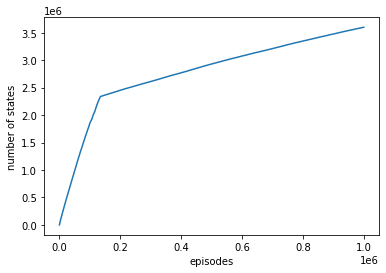

In [11]:
plt.plot(states)
plt.xlabel('episodes')
plt.ylabel('number of states')

We plot the number of steps per episode (averaged over 100 consecutive episodes and smoothing)

Text(0, 0.5, 'number of steps')

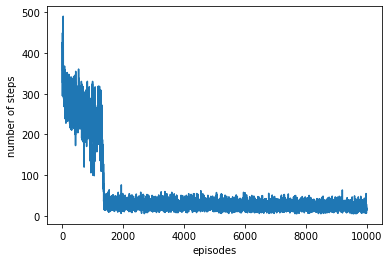

In [12]:
plt.plot(np.mean(np.array(steps).reshape(-1,100),axis=1))
plt.xlabel('episodes')
plt.ylabel('number of steps')

Text(0, 0.5, 'number of steps')

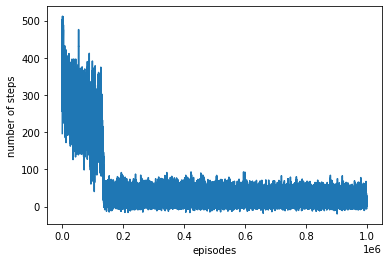

In [13]:
plt.plot(SGfilter(steps,101,3))
plt.xlabel('episodes')
plt.ylabel('number of steps')

We plot the amount of reward per episode (averaged over 100 consecutive episodes)

Text(0, 0.5, 'reward')

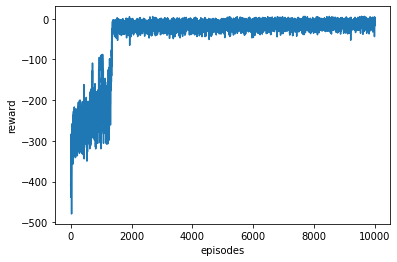

In [14]:
plt.plot(np.mean(np.array(rewards).reshape(-1,100),axis=1))
plt.xlabel('episodes')
plt.ylabel('reward')

We now further run the agent in a test setting for further $100$ epiodes, by making its policy deterministic and setting the exploration parameter $\epsilon$ to 0.

In [15]:
nepisodes = 100

agt.set_learning_options(exploration=0.0)

Tsteps = []; Trewards = []; Tstates = []
for _ in tqdm(range(nepisodes)):
    env = SQLenv.mockSQLenv(verbose=False)
    
    agt.reset(env)
    agt.run_episode()
    
    Tsteps.append(agt.steps)
    Trewards.append(agt.rewards)
    Tstates.append(ut.getdictshape(agt.Q)[0])    

100%|██████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 1645.85it/s]


We plot the number of steps taken and their average.

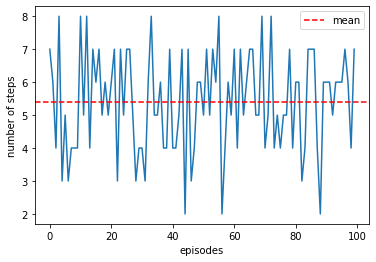

In [16]:
#plt.plot(np.mean(np.array(Tsteps).reshape(-1,10),axis=1))
plt.plot(Tsteps)
plt.xlabel('episodes')
plt.ylabel('number of steps')
plt.axhline(np.average(Tsteps),c='red',ls='--',label='mean')
plt.legend()

We plot the rewards and its average.

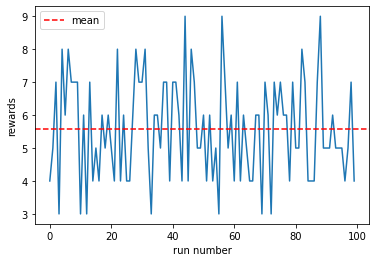

In [17]:
#plt.plot(np.mean(np.array(Trewards).reshape(-1,10),axis=1))
plt.plot(Trewards)
plt.xlabel('run number')
plt.ylabel('rewards')
plt.axhline(np.average(Trewards),c='red',ls='--',label='mean')
plt.legend()

17 ' and '1'='1


Text(0, 0.5, 'Q-value')

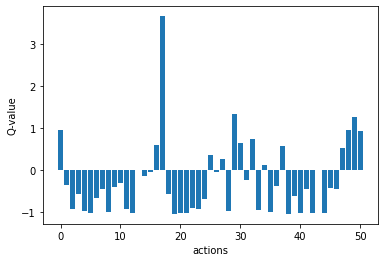

In [18]:
first_act = np.argmax(agt.Q[()])
print(first_act, my_actions[first_act])
plt.bar(np.arange(len(agt.Q[()])), agt.Q[()])
plt.xlabel('actions')
plt.ylabel('Q-value')

In [19]:
second_act = np.argmax(agt.Q[((first_act,),)])
print(first_act, my_actions[first_act])
print(second_act, my_actions[second_act])
plt.bar(np.arange(len(agt.Q[((first_act,second_act),)])), agt.Q[((first_act,second_act,),)])
plt.xlabel('actions')
plt.ylabel('Q-value')

17 ' and '1'='1
0 " and "1"="1


KeyError: ((17, 0),)

In [20]:
print(first_act, my_actions[first_act])
print(second_act, my_actions[second_act])
plt.bar(np.arange(len(agt.Q[((first_act,),(second_act,))])), agt.Q[((first_act,),(second_act,))])
plt.xlabel('actions')
plt.ylabel('Q-value')

17 ' and '1'='1
0 " and "1"="1


KeyError: ((17,), (0,))

In [21]:
print(agt.Q[((first_act,second_act),)])
print(agt.Q[((first_act,),(second_act,))])

KeyError: ((17, 0),)

In [22]:
third_act1 = np.argmax(agt.Q[((first_act,second_act),)])
print(first_act, my_actions[first_act])
print(second_act, my_actions[second_act])
print(third_act1, my_actions[third_act1])
print(agt.Q[((first_act,second_act),(1,))])
plt.bar(np.arange(len(agt.Q[((first_act,second_act,third_act1,),)])), agt.Q[((first_act,second_act,third_act,),)])
plt.xlabel('actions')
plt.ylabel('Q-value')

KeyError: ((17, 0),)

In [25]:
env = SQLenv.mockSQLenv(verbose=False)
agt.reset(env)
agt.run_human_look_episode()

Game reset
step 1
My state is
()
My Q row looks like this:
[ 0.95397621 -0.3389037  -0.92015423 -0.57182522 -0.96454564 -1.01860412
 -0.66709933 -0.43547927 -0.9948837  -0.40227223 -0.3059405  -0.91615926
 -1.00223305  0.00427188 -0.13075885 -0.04555699  0.59673848  3.60059634
 -0.57310072 -1.03449431 -1.00873308 -1.01359389 -0.89215626 -0.92363537
 -0.68475807  0.35973031 -0.03068222  0.27843509 -0.97179397  1.33791101
  0.63738202 -0.23160779  0.73506004 -0.93766354  0.13415527 -0.98546689
 -0.38284702  0.57422882 -1.02562744 -0.61306322 -1.00437666 -0.44086053
 -1.02090975  0.01820068 -1.01145464 -0.41024841 -0.43185768  0.54012274
  0.95628299  1.25238488  0.92695683]
Action ranking is
[17 29 49 48  0 50 32 30 16 37 47 25 27 34 43 13 26 15 14 31 10  1 36  9
 45 46  7 41  3 18 39  6 24 22 11  2 23 33  4 28 35  8 12 40 20 44 21  5
 42 38 19]
action equal highest rank True
' and '1'='1
Server response is -1
step 2
My state is
((18,),)
My Q row looks like this:
[ 1.94075977 -0.18115389

True

In [26]:
env = SQLenv.mockSQLenv(verbose=False)
agt.reset(env)
agt.run_human_look_episode()

Game reset
step 1
My state is
()
My Q row looks like this:
[ 0.95397621 -0.3389037  -0.92015423 -0.57182522 -0.96454564 -1.01860412
 -0.66709933 -0.43547927 -0.9948837  -0.40227223 -0.3059405  -0.91615926
 -1.00223305  0.00427188 -0.13075885 -0.04555699  0.59673848  3.56889237
 -0.57310072 -1.03449431 -1.00873308 -1.01359389 -0.89215626 -0.92363537
 -0.68475807  0.35973031 -0.03068222  0.27843509 -0.97179397  1.33791101
  0.63738202 -0.23160779  0.73506004 -0.93766354  0.13415527 -0.98546689
 -0.38284702  0.57422882 -1.02562744 -0.61306322 -1.00437666 -0.44086053
 -1.02090975  0.01820068 -1.01145464 -0.41024841 -0.43185768  0.54012274
  0.95628299  1.25238488  0.92695683]
Action ranking is
[17 29 49 48  0 50 32 30 16 37 47 25 27 34 43 13 26 15 14 31 10  1 36  9
 45 46  7 41  3 18 39  6 24 22 11  2 23 33  4 28 35  8 12 40 20 44 21  5
 42 38 19]
action equal highest rank True
' and '1'='1
Server response is 1
step 2
My state is
((18,),)
My Q row looks like this:
[ 1.94075977 -0.18115389 

True

In [ ]:
env = SQLenv.mockSQLenv(verbose=False)
agt.reset(env)
agt.run_human_look_episode(verbose = False)